# Perkenalan

- Nama: Muhamad Afif Thufail
- Batch : FTDS Batch 10
- Dataset : Telco Customer Churn


# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terdapat 20 kolom dan 7043 baris pada dataset tersebut. 1 kolom bertipe float, 2 kolom bertipe integer, dan 18 kolom bertipe object

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada missing values pada dataset tersebut.

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Kolom SeniorCitizen kemungkinan adalah kolom dengan tipe data boolean.

# Exploratory Data Analysis

In [6]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Terdapat 2 output yaitu No dan Yes, output-output tersebut perlu dilakukan perubahan menjadi No = 0 dan Yes = 1

churn rate adalah tingkat atau persentase pelanggan memutus hubungan dengan sebuah bisnis atau perusahaan pada quarter tertentu. 
Sumber: https://www.investopedia.com/terms/c/churnrate.asp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a7f4edb90>,
      dtype=object)

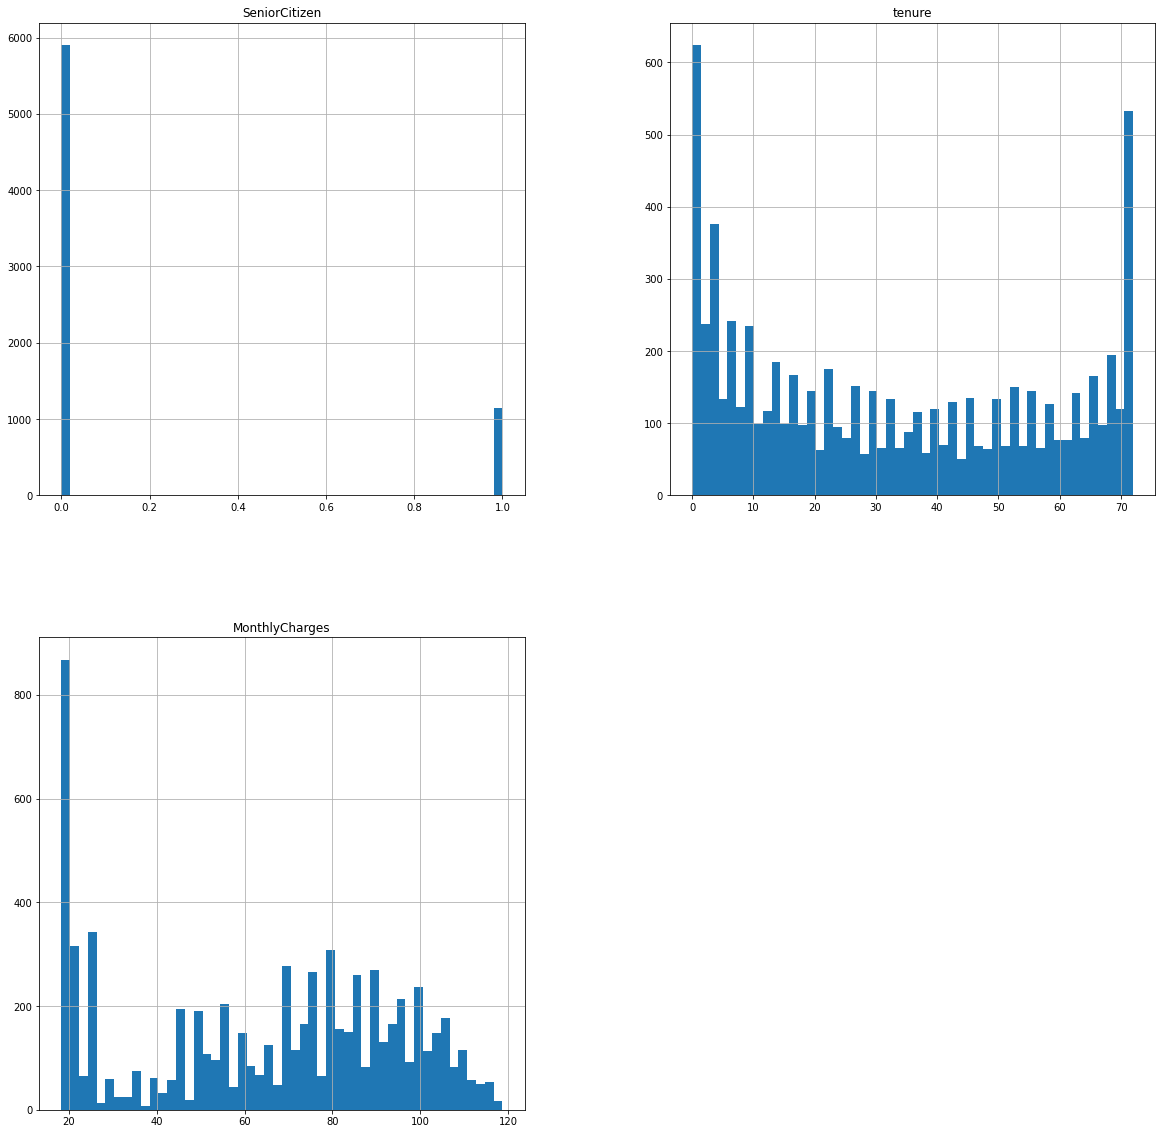

In [7]:
data.hist(figsize=(20,20), bins=50)

- Kolom SeniorCitizen merupakan kolom bertipe boolean dimana 0 kemungkinan adalah tidak dan 1 kemungkinan adalah iya

- Kebanyakan tenure berada pada nilai 0 dan 70

- Kebanyakan MonthlyCharges berada pada nilai 20

In [8]:
groupby_target = data.groupby('Churn').mean()
groupby_target

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


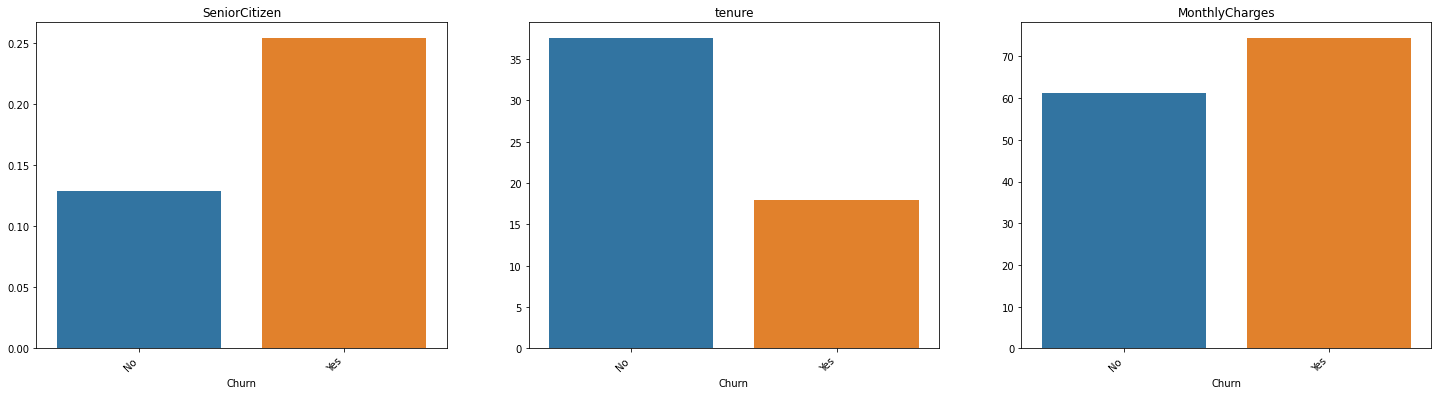

In [9]:
fig,axes=plt.subplots(1,3, figsize=(25,6))
axe= axes.ravel()
for i,col in enumerate(groupby_target.columns):
    sns.barplot(x=groupby_target[col].index, y=groupby_target[col].values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=45, ha='right')
    axe[i].set_title(col)
plt.show()

In [10]:
cat_data = data[[
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']]

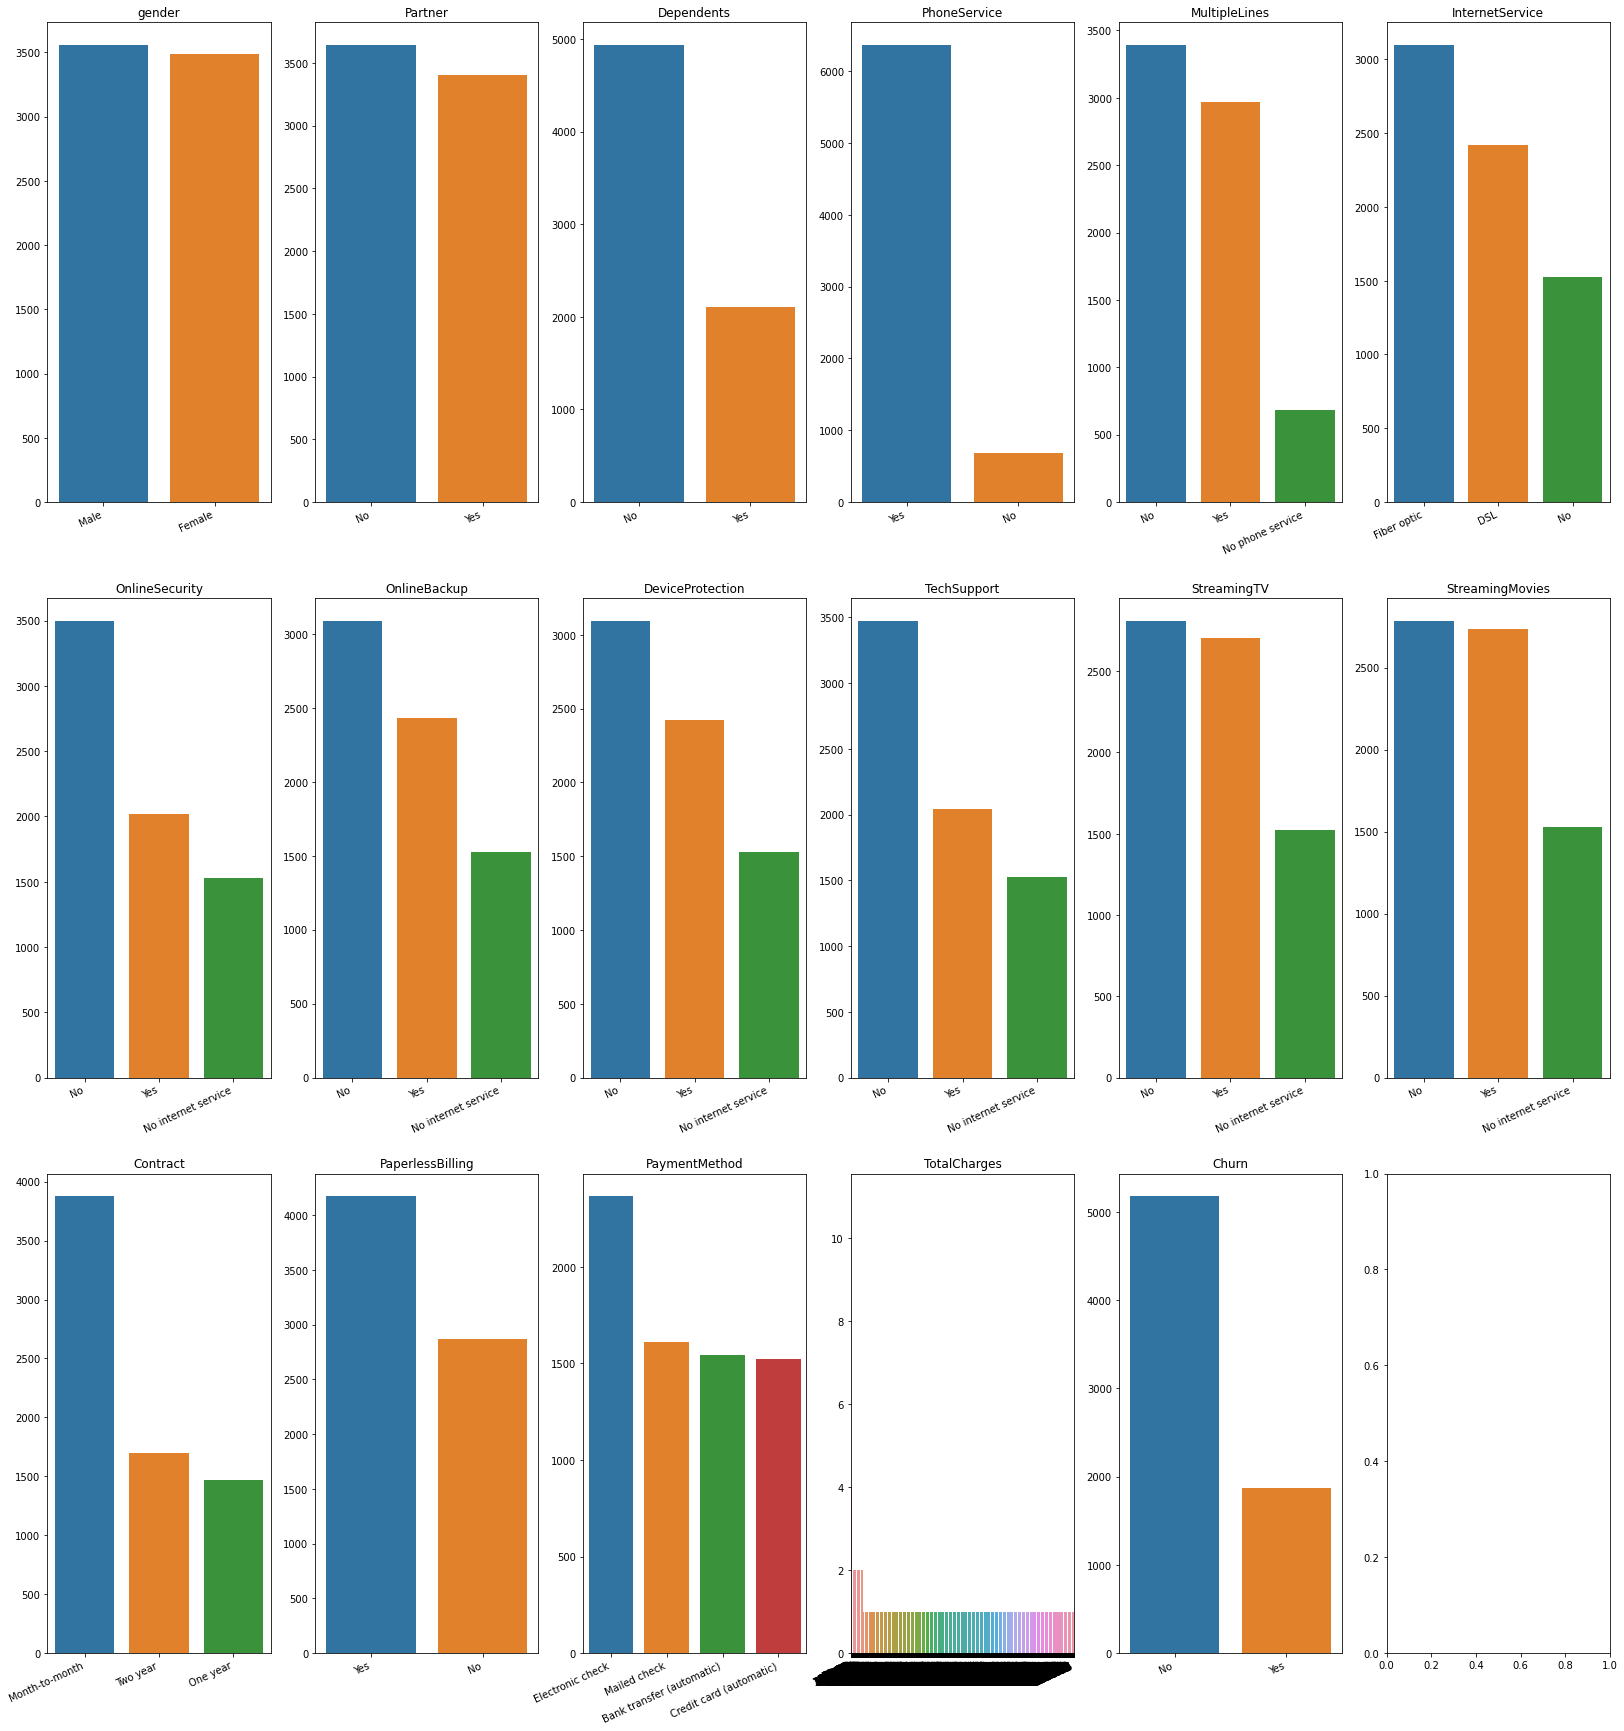

In [11]:
fig,axes=plt.subplots(3,6, figsize=(28,30))
axe=axes.ravel()
for i,col in enumerate(cat_data.columns):
    sns.barplot(x=cat_data[col].value_counts().index, y=cat_data[col].value_counts().values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=25, ha='right')
    axe[i].set_title(col)

In [12]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Kolom TotalCharges seharsunya merupakan data bertipe float

- Jumlah wanita da pria hampir sama.

- Jumlah customer yang tidak memiliki pasangan lebih banyak sedikit daripada customer yang memiliki pasangan.

- Jumlah customer yang tidak memiliki tanggungan (dependents) dua kali lebih banyak dibandingkan customer yang memiliki tanggungan.

- Jumlah customer yang memiliki layanan telepon jauh lebih banyak dari yang tidak, kemungkinan ini berkaitan dengan seseorang yang senior citizen atau tidak.

- Kebanyakan customer tidak punya nomor telepon lebih dari satu, tetapi banyak juga customer yang punya nomor telepon lebih dari 1, dan hanya sedikit yang tidak memiliki nomor telepon.

- Kebanyakan customer memiliki layanan internet fiber optic, dan banyak juga yang layanan internetnya DSL. Namun ada cukup banyak juga customer yang tidak memiliki layanan internet.

- Kebanyakan customer tidak memiliki online security, online backup, device protection, dan tech support, sebagian lainnya memiliki keempatnya. 

- Customer yang tidak memiliki layanan Streaming TV dan Streaming Movies hampir sama banyaknya dengan customer yang memiliki kedua layanan tersebut.

- Kebanyakan customer memiliki kontrak month-to-month dan sebagiannya lagi kontraknya dua tahun dan satu tahun.

- Kebanyakan customer memiliki alat pembayaran non-tunai dan sebagiannya tidak memiliki alat pembayaran non-tunai.

- Kebanyakan customer melakukan metode pembayaran dengan electronic check dan sebagian lagi melakukan metode pembayaran dengan Mailed Check, transfer bank, dan kartu kredit.
 

In [13]:
data_2 = data[data['Churn']=='Yes']
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [14]:
cat_data2 = data_2[[
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']]

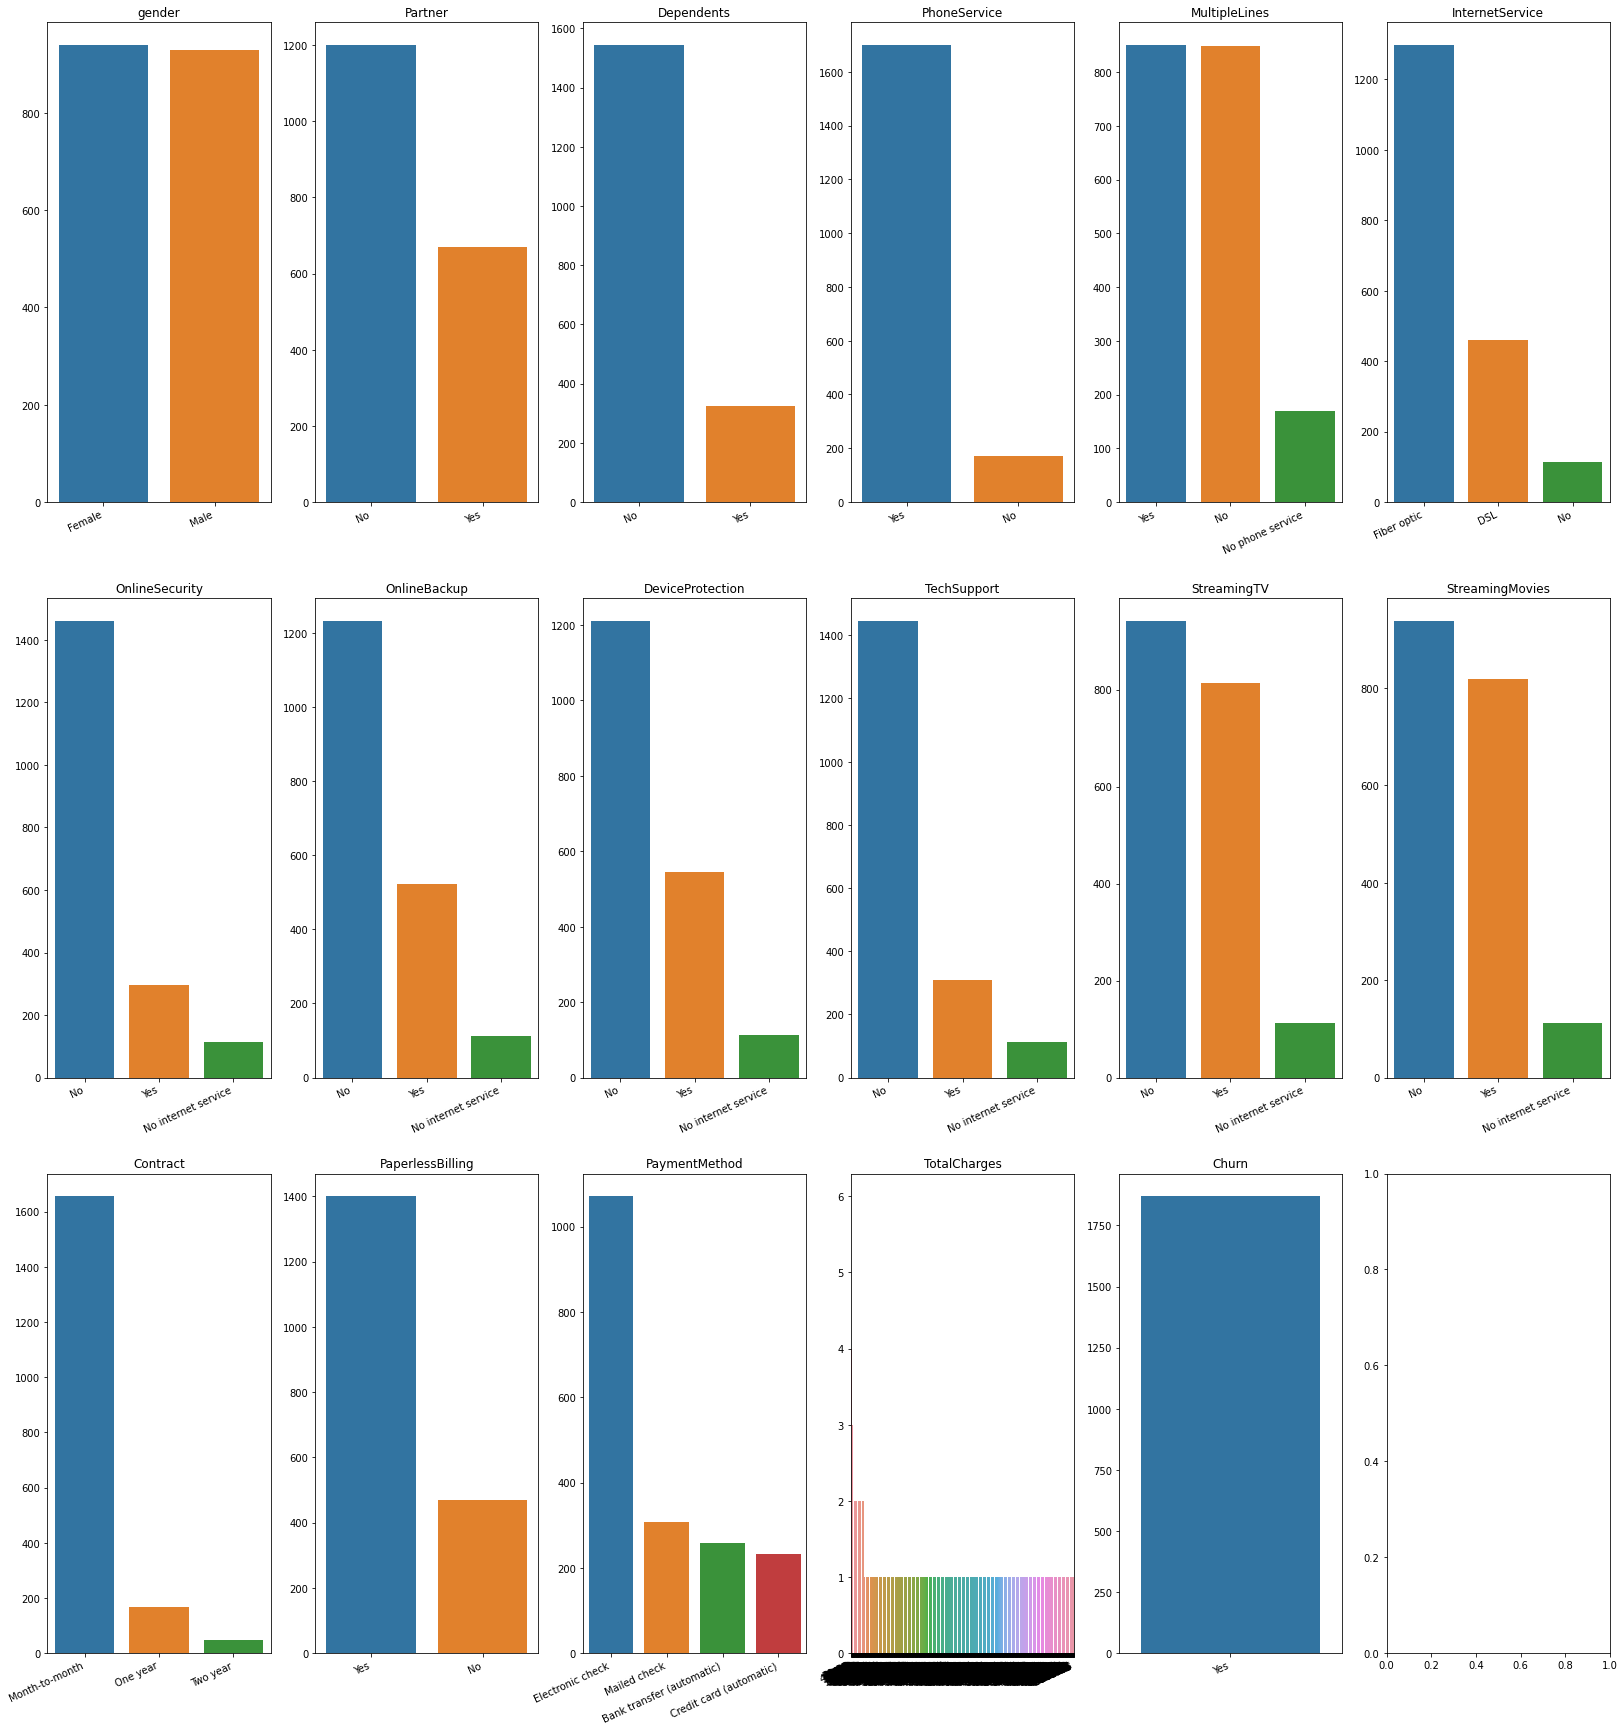

In [15]:
fig,axes=plt.subplots(3,6, figsize=(28,30))
axe=axes.ravel()
for i,col in enumerate(cat_data2.columns):
    sns.barplot(x=cat_data2[col].value_counts().index, y=cat_data2[col].value_counts().values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=25, ha='right')
    axe[i].set_title(col)

- Terdapat perbedaan yang signifikan customer yang melakukan churn terdapat pada kolom Online Security dan Contract.

- Customer yang memiliki pasangan cenderung untuk tidak melakukan churn.

- Customer yang melakukan churn pada kolom multiple lines jumlahnya yang memiliki nomor lebih dari 1 dan yang tidak jumlahnya hampir sama, padahal sebelumnya keseluruhannya jumlah yang tidak memiliki nomor lebih dari 1 sedikit lebih banyak dibandingkan yang tidak. 

- Customer yang melakukan churn cenderung tidak memiliki Online Backup, Device Protection, dan Tech Support. 

- Customer yang melakukan churn juga cendering menyukai pembayaran non-tunai.

# Data Preprocessing

In [16]:
data['Churn'] = data['Churn'].map({'No':0,
                               'Yes': 1})

In [17]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

In [18]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No',
                               1: 'Yes'})

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
data['Churn'].unique()

array([0, 1])

### Data Inferenced

In [21]:
data_inf = data.sample(10, random_state=25)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4864,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
5033,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2671,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3919,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
3630,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
6110,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
792,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
5747,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
3593,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
2174,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


In [22]:
data = data.drop(data_inf.index)
data 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [23]:
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### Split between X_train and X_test

In [24]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=25)

### Handling Outlier

In [26]:
def check_outliers(data, column):
    skewness = data[column].skew(axis=0, skipna=True)
    if skewness <= 0.5 and skewness >=-0.5:
       
        upper_boundary = data[column].mean() + 3 * data[column].std()
        lower_boundary = data[column].mean() - 3 * data[column].std()
        print(['Normal'])
        print(f'Upper Boundary of {column}:', upper_boundary)
        print(f'Lower Boundary of {column}:', lower_boundary)
        jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
        print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
        jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
        print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
        persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
        print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
        persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
        print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
        print('-'*100)
    else:
         IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
         lower_boundary = data[column].quantile(0.25) - (IQR * 1.5)
         upper_boundary = data[column].quantile(0.75) + (IQR * 1.5)
         print(['Skewed'])
         print(f'Upper Boundary of {column}:', upper_boundary)
         print(f'Lower Boundary of {column}:', lower_boundary)
         jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
         print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
         jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
         print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
         persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
         print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
         persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
         print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
         print('-'*100)

In [27]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
for column in num_columns:
     check_outliers(X_train, column)

['Normal']
Upper Boundary of tenure: 106.23011620441174
Lower Boundary of tenure: -41.280876623135825
Total Data Above Upper Boundary tenure: 0
Total Data Below Lower Boundary tenure: 0
% Data Above Upper Boundary tenure: 0.0
% Data Below Lower Boundary tenure: 0.0
----------------------------------------------------------------------------------------------------
['Normal']
Upper Boundary of MonthlyCharges: 155.0405964372764
Lower Boundary of MonthlyCharges: -25.925012791217412
Total Data Above Upper Boundary MonthlyCharges: 0
Total Data Below Lower Boundary MonthlyCharges: 0
% Data Above Upper Boundary MonthlyCharges: 0.0
% Data Below Lower Boundary MonthlyCharges: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of TotalCharges: 8864.40625
Lower Boundary of TotalCharges: -4672.943749999999
Total Data Above Upper Boundary TotalCharges: 0
Total Data Below Lower Boundary TotalCharges: 0
% Data Above Upper

Tidak ada outlier pada kolom numerikalnya.

### Handling Missing Values

In [28]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64

In [29]:
X_train['TotalCharges'].skew()

0.9714547187185171

In [30]:
print(X_train['TotalCharges'].median())

1389.475


In [31]:
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)

In [32]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [33]:
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [34]:
X_test['TotalCharges'].fillna(1389.475, inplace=True)

In [35]:
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [36]:
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [37]:
X_val['TotalCharges'].fillna(1389.475, inplace=True)

In [38]:
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [39]:
data_inf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Feature Selection

In [40]:
X_train.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'], axis=1, inplace=True)
X_val.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'], axis=1, inplace=True)
X_test.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'] ,axis=1, inplace=True)

In [41]:
X_train.head()

,SeniorCitizen,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges
3769,Yes,Yes,52,Yes,DSL,No,Yes,Yes,No,One year,80.85,4079.55
6728,No,No,1,No,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,20.35,20.35
2004,No,Yes,49,Yes,Fiber optic,No,Yes,No,No,One year,100.45,4941.80
6026,Yes,Yes,66,Yes,Fiber optic,No,Yes,Yes,Yes,One year,110.85,7491.75
4899,No,Yes,72,Yes,Fiber optic,Yes,Yes,No,No,Two year,95.90,6954.15


### Numerical Columns and Categorical Columns

In [42]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['SeniorCitizen', 'Partner', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract']


In [43]:
def diagnostic_plots(data, column):
  skewness = data[column].skew(axis=0, skipna = True)
  print(f'Skewness of {column} =',skewness)

for column in num_columns:
     diagnostic_plots(X_train, column)

Skewness of tenure = 0.24310863528117743
Skewness of MonthlyCharges = -0.21441118803491116
Skewness of TotalCharges = 0.973908749559032


In [44]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [45]:
X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)
X_test = data_pipeline.transform(X_test)

In [46]:
X_train.shape

(5063, 28)

In [47]:
X_val.shape

(563, 28)

In [48]:
X_test.shape

(1407, 28)

In [49]:
import pickle

with open('preprocessing.pkl', 'wb') as f:
    pickle.dump(data_pipeline, f)


### Create Dataset from Tensor

# Model Definition, Training, dan Evaluation

## Arsitektur Sequential API

In [50]:
# sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

# buat arsitekturnya

model = Sequential()
model.add(Dense(20, activation='relu',  input_shape=(28,))) # hidden layer 1
model.add(Dropout(0.5))
model.add(Dense(10, activation="relu"))# hidden layer 2
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # Ouput layer

In [51]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [52]:
# train
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.5658 - accuracy: 0.7272 - val_loss: 0.4600 - val_accuracy: 0.7407
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7349 - val_loss: 0.4365 - val_accuracy: 0.7407
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7371 - val_loss: 0.4312 - val_accuracy: 0.7407
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7476 - val_loss: 0.4281 - val_accuracy: 0.7478
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7535 - val_loss: 0.4227 - val_accuracy: 0.7869
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7545 - val_loss: 0.4208 - val_accuracy: 0.7869
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7642 - val_loss: 0.4187 - val_accuracy: 0.8064

In [53]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.565771,0.727237,0.460047,0.740675
1,0.517642,0.734940,0.436528,0.740675
2,0.511194,0.737112,0.431180,0.740675
3,0.496856,0.747580,0.428116,0.747780
4,0.491149,0.753506,0.422700,0.786856
...,...,...,...,...
295,0.437790,0.785898,0.410006,0.818828
296,0.438268,0.790045,0.413453,0.820604
297,0.433162,0.785108,0.409084,0.822380
298,0.437558,0.783923,0.410733,0.820604


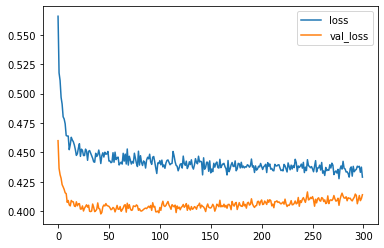

In [54]:
metrics[['loss', 'val_loss']].plot();

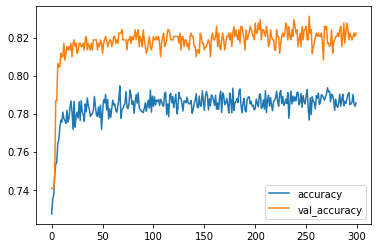

In [55]:
metrics[['accuracy', 'val_accuracy']].plot();

In [56]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1028
           1       0.66      0.50      0.57       379

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                580       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_seq_2 = Sequential()
model_seq_2.add(Dense(25, activation='relu',  input_shape=(28,))) # hidden layer 1
model_seq_2.add(Dropout(0.25))
model_seq_2.add(Dense(15, activation="relu"))# hidden layer 2
model_seq_2.add(Dropout(0.25))
model_seq_2.add(Dense(5, activation="relu"))# hidden layer 3
model_seq_2.add(Dropout(0.25))
model_seq_2.add(Dense(1, activation='sigmoid')) # Ouput layer

In [59]:
model_seq_2.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [60]:
history_seq_2 = model_seq_2.fit(X_train, y_train, epochs=400, validation_data=(X_val,y_val))

Epoch 1/400
159/159 [==============================] - 1s 3ms/step - loss: 0.6056 - accuracy: 0.6887 - val_loss: 0.4757 - val_accuracy: 0.7407
Epoch 2/400
159/159 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7300 - val_loss: 0.4354 - val_accuracy: 0.7407
Epoch 3/400
159/159 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7460 - val_loss: 0.4222 - val_accuracy: 0.7869
Epoch 4/400
159/159 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7620 - val_loss: 0.4100 - val_accuracy: 0.8011
Epoch 5/400
159/159 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7711 - val_loss: 0.4127 - val_accuracy: 0.8064
Epoch 6/400
159/159 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7701 - val_loss: 0.4111 - val_accuracy: 0.8082
Epoch 7/400
159/159 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7727 - val_loss: 0.4082 - val_accuracy: 0.8188

In [61]:
metrics_seq_2 = pd.DataFrame(history_seq_2.history)
metrics_seq_2

,loss,accuracy,val_loss,val_accuracy
0,0.605650,0.688722,0.475723,0.740675
1,0.533142,0.730002,0.435411,0.740675
2,0.506316,0.746000,0.422187,0.786856
3,0.488776,0.761999,0.409955,0.801066
4,0.476038,0.771084,0.412712,0.806394
...,...,...,...,...
395,0.421464,0.792416,0.434608,0.824156
396,0.413284,0.794983,0.429693,0.827709
397,0.413268,0.798538,0.432506,0.831261
398,0.416563,0.797551,0.423963,0.824156


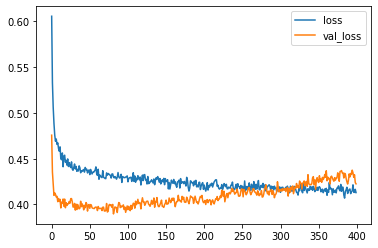

In [62]:
metrics_seq_2[['loss', 'val_loss']].plot();

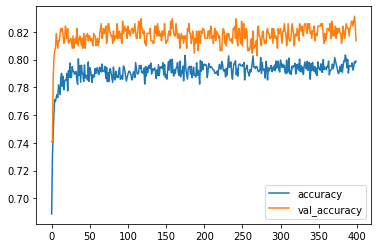

In [63]:
metrics_seq_2[['accuracy', 'val_accuracy']].plot();

In [64]:
model_seq_3 = Sequential()
model_seq_3.add(Dense(20, activation='relu',  input_shape=(28,))) # hidden layer 1
model_seq_3.add(Dropout(0.25))
model_seq_3.add(Dense(10, activation="relu"))# hidden layer 2
model_seq_3.add(Dropout(0.25))
model_seq_3.add(Dense(1, activation='sigmoid')) # Ouput layer

In [65]:
model_seq_3.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [66]:
history_seq_3 = model_seq_3.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.5650 - accuracy: 0.6960 - val_loss: 0.4280 - val_accuracy: 0.8082
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7636 - val_loss: 0.4084 - val_accuracy: 0.8117
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7806 - val_loss: 0.4067 - val_accuracy: 0.8117
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7796 - val_loss: 0.3998 - val_accuracy: 0.8171
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.7794 - val_loss: 0.3972 - val_accuracy: 0.8188
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7819 - val_loss: 0.3920 - val_accuracy: 0.8153
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.7902 - val_loss: 0.3914 - val_accuracy: 0.8153

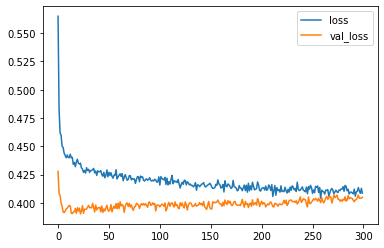

In [67]:
metrics_seq_3 = pd.DataFrame(history_seq_3.history)
metrics_seq_3[['loss', 'val_loss']].plot();

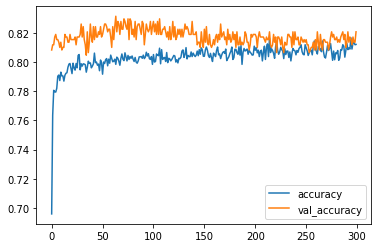

In [68]:
metrics_seq_3[['accuracy', 'val_accuracy']].plot();

In [69]:
model_seq_4 = Sequential()
model_seq_4.add(Dense(20, activation='elu',  input_shape=(28,))) # hidden layer 1
model_seq_4.add(Dropout(0.5))
model_seq_4.add(Dense(10, activation="elu"))# hidden layer 2
model_seq_4.add(Dropout(0.5))
model_seq_4.add(Dense(1, activation='sigmoid')) # Ouput layer

In [70]:
model_seq_4.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [71]:
history_seq_4 = model_seq_4.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.6420 - accuracy: 0.6553 - val_loss: 0.4472 - val_accuracy: 0.7673
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7626 - val_loss: 0.4078 - val_accuracy: 0.8046
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7713 - val_loss: 0.4019 - val_accuracy: 0.8028
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7794 - val_loss: 0.3979 - val_accuracy: 0.8117
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7841 - val_loss: 0.3958 - val_accuracy: 0.8135
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7835 - val_loss: 0.3952 - val_accuracy: 0.8153
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7812 - val_loss: 0.3936 - val_accuracy: 0.8153

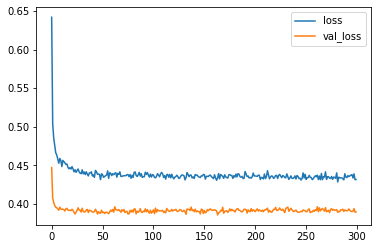

In [72]:
metrics_seq_4 = pd.DataFrame(history_seq_4.history)
metrics_seq_4[['loss', 'val_loss']].plot();

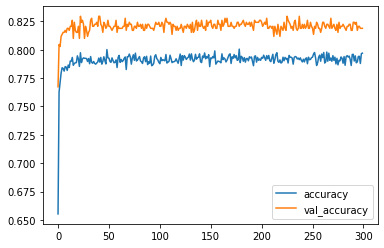

In [73]:
metrics_seq_4[['accuracy', 'val_accuracy']].plot();

In [74]:
model_seq_5 = Sequential()
model_seq_5.add(Dense(25, activation='relu',  input_shape=(28,))) # hidden layer 1
model_seq_5.add(Dropout(0.5))
model_seq_5.add(Dense(15, activation="relu"))# hidden layer 2
model_seq_5.add(Dropout(0.5))
model_seq_5.add(Dense(5, activation="relu"))# hidden layer 3
model_seq_5.add(Dropout(0.5))
model_seq_5.add(Dense(1, activation='sigmoid')) # Ouput layer

In [75]:
model_seq_5.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [76]:
history_seq_5 = model_seq_5.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.6486 - accuracy: 0.6802 - val_loss: 0.5802 - val_accuracy: 0.7407
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7312 - val_loss: 0.5091 - val_accuracy: 0.7407
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7347 - val_loss: 0.4921 - val_accuracy: 0.7407
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7322 - val_loss: 0.4676 - val_accuracy: 0.7407
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7345 - val_loss: 0.4604 - val_accuracy: 0.7407
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7341 - val_loss: 0.4664 - val_accuracy: 0.7407
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7353 - val_loss: 0.4514 - val_accuracy: 0.7407

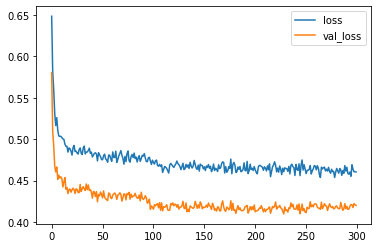

In [77]:
metrics_seq_5 = pd.DataFrame(history_seq_5.history)
metrics_seq_5[['loss', 'val_loss']].plot();

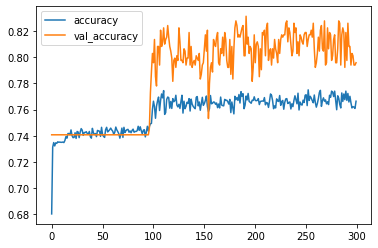

In [78]:
metrics_seq_5[['accuracy', 'val_accuracy']].plot();

In [79]:
model_seq_6 = Sequential()
model_seq_6.add(Dense(25, activation='elu',  input_shape=(28,))) # hidden layer 1
model_seq_6.add(Dropout(0.5))
model_seq_6.add(Dense(15, activation="elu"))# hidden layer 2
model_seq_6.add(Dropout(0.5))
model_seq_6.add(Dense(5, activation="elu"))# hidden layer 3
model_seq_6.add(Dropout(0.5))
model_seq_6.add(Dense(1, activation='sigmoid')) # Ouput layer

In [80]:
model_seq_6.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [81]:
history_seq_6 = model_seq_6.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.7140 - accuracy: 0.6417 - val_loss: 0.4696 - val_accuracy: 0.7673
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7257 - val_loss: 0.4293 - val_accuracy: 0.7940
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7582 - val_loss: 0.4181 - val_accuracy: 0.8135
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7596 - val_loss: 0.4134 - val_accuracy: 0.8135
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7683 - val_loss: 0.4169 - val_accuracy: 0.8135
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7687 - val_loss: 0.4086 - val_accuracy: 0.8153
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7729 - val_loss: 0.4114 - val_accuracy: 0.8135

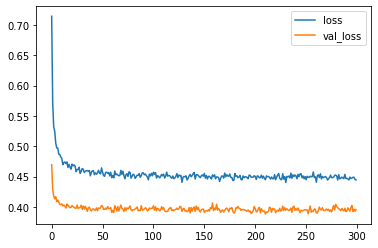

In [82]:
metrics_seq_6 = pd.DataFrame(history_seq_6.history)
metrics_seq_6[['loss', 'val_loss']].plot();

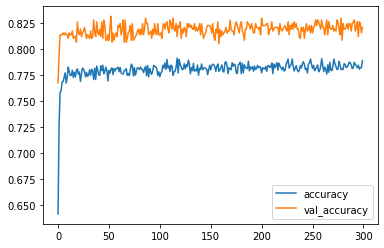

In [83]:
metrics_seq_6[['accuracy', 'val_accuracy']].plot();

In [84]:
model_seq_7 = Sequential()
model_seq_7.add(Dense(20, activation='elu',  input_shape=(28,))) # hidden layer 1
model_seq_7.add(Dropout(0.25))
model_seq_7.add(Dense(10, activation="elu"))# hidden layer 2
model_seq_7.add(Dropout(0.25))
model_seq_7.add(Dense(1, activation='sigmoid')) # Ouput layer

In [85]:
model_seq_7.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [86]:
history_seq_7 = model_seq_7.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.5066 - accuracy: 0.7517 - val_loss: 0.4025 - val_accuracy: 0.8046
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7735 - val_loss: 0.3924 - val_accuracy: 0.8171
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.7887 - val_loss: 0.3954 - val_accuracy: 0.8099
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.7897 - val_loss: 0.3930 - val_accuracy: 0.8206
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7891 - val_loss: 0.3927 - val_accuracy: 0.8242
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7902 - val_loss: 0.3906 - val_accuracy: 0.8259
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.7914 - val_loss: 0.3895 - val_accuracy: 0.8224

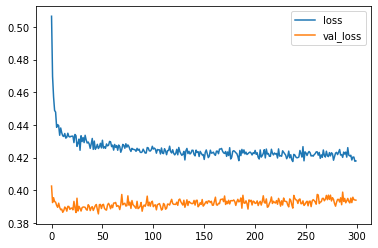

In [87]:
metrics_seq_7 = pd.DataFrame(history_seq_7.history)
metrics_seq_7[['loss', 'val_loss']].plot();

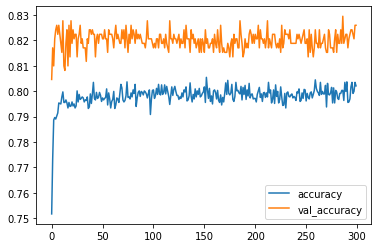

In [88]:
metrics_seq_7[['accuracy', 'val_accuracy']].plot();

In [89]:
model_seq_8 = Sequential()
model_seq_8.add(Dense(25, activation='elu',  input_shape=(28,))) # hidden layer 1
model_seq_8.add(Dropout(0.25))
model_seq_8.add(Dense(15, activation="elu"))# hidden layer 2
model_seq_8.add(Dropout(0.25))
model_seq_8.add(Dense(5, activation="elu"))# hidden layer 3
model_seq_8.add(Dropout(0.25))
model_seq_8.add(Dense(1, activation='sigmoid')) # Ouput layer

In [90]:
model_seq_8.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [91]:
history_seq_8 = model_seq_8.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.5411 - accuracy: 0.7162 - val_loss: 0.4102 - val_accuracy: 0.8028
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7727 - val_loss: 0.4005 - val_accuracy: 0.8028
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7849 - val_loss: 0.3973 - val_accuracy: 0.8046
Epoch 4/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.7893 - val_loss: 0.3933 - val_accuracy: 0.8135
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7867 - val_loss: 0.3942 - val_accuracy: 0.8117
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7863 - val_loss: 0.3941 - val_accuracy: 0.8135
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7916 - val_loss: 0.3910 - val_accuracy: 0.8135

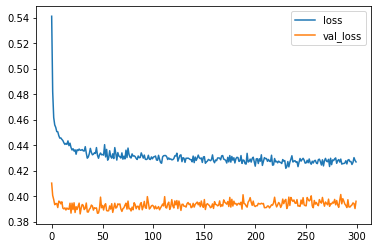

In [92]:
metrics_seq_8 = pd.DataFrame(history_seq_8.history)
metrics_seq_8[['loss', 'val_loss']].plot();

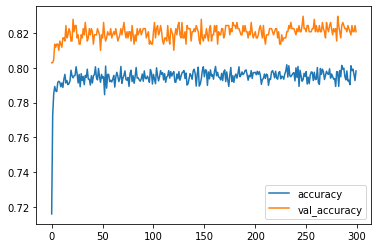

In [93]:
metrics_seq_8[['accuracy', 'val_accuracy']].plot();

In [94]:
model_seq_9 = Sequential()
model_seq_9.add(Dense(15, activation='relu', input_shape=(28,))) # hidden layer 1
model_seq_9.add(Dropout(0.25))
model_seq_9.add(Dense(1, activation='sigmoid')) # output layer

In [95]:
model_seq_9.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [96]:
history_seq_9 = model_seq_9.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.5157 - accuracy: 0.7320 - val_loss: 0.4249 - val_accuracy: 0.8099
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7752 - val_loss: 0.4098 - val_accuracy: 0.8153
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7825 - val_loss: 0.4069 - val_accuracy: 0.8117
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.7869 - val_loss: 0.4034 - val_accuracy: 0.8082
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.7912 - val_loss: 0.3985 - val_accuracy: 0.8028
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.7924 - val_loss: 0.3966 - val_accuracy: 0.8011
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7979 - val_loss: 0.3994 - val_accuracy: 0.8028

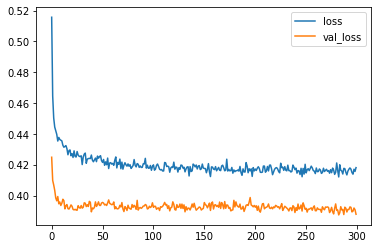

In [97]:
metrics_seq_9 = pd.DataFrame(history_seq_9.history)
metrics_seq_9[['loss', 'val_loss']].plot();

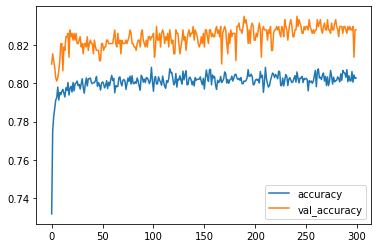

In [98]:
metrics_seq_9[['accuracy', 'val_accuracy']].plot();

In [99]:
model_seq_10 = Sequential()
model_seq_10.add(Dense(15, activation='relu', input_shape=(28,))) # hidden layer 1
model_seq_10.add(Dense(1, activation='sigmoid')) # output layer

In [100]:
model_seq_10.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [101]:
history_seq_10 = model_seq_10.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7108 - val_loss: 0.4303 - val_accuracy: 0.7975
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7865 - val_loss: 0.4029 - val_accuracy: 0.8064
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7940 - val_loss: 0.3970 - val_accuracy: 0.8099
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7940 - val_loss: 0.3961 - val_accuracy: 0.8171
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7985 - val_loss: 0.3959 - val_accuracy: 0.8117
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7968 - val_loss: 0.3930 - val_accuracy: 0.8277
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.7977 - val_loss: 0.3912 - val_accuracy: 0.8224

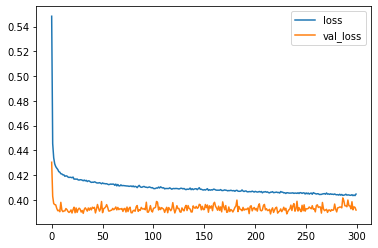

In [102]:
metrics_seq_10 = pd.DataFrame(history_seq_10.history)
metrics_seq_10[['loss', 'val_loss']].plot();

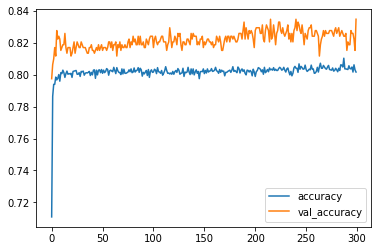

In [103]:
metrics_seq_10[['accuracy', 'val_accuracy']].plot();

In [104]:
model_seq_11 = Sequential()
model_seq_11.add(Dense(15, activation='elu', input_shape=(28,))) # hidden layer 1
model_seq_11.add(Dense(1, activation='sigmoid')) # output layer

In [119]:
model_seq_11.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [106]:
history_seq_11 = model_seq_11.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.6130 - accuracy: 0.6871 - val_loss: 0.4227 - val_accuracy: 0.8099
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.7906 - val_loss: 0.3943 - val_accuracy: 0.8028
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7976 - val_loss: 0.3900 - val_accuracy: 0.8135
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.7981 - val_loss: 0.3883 - val_accuracy: 0.8188
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7977 - val_loss: 0.3878 - val_accuracy: 0.8224
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7991 - val_loss: 0.3878 - val_accuracy: 0.8224
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7989 - val_loss: 0.3871 - val_accuracy: 0.8206

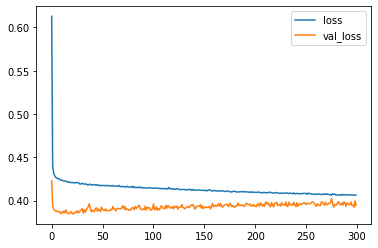

In [107]:
metrics_seq_11 = pd.DataFrame(history_seq_11.history)
metrics_seq_11[['loss', 'val_loss']].plot();

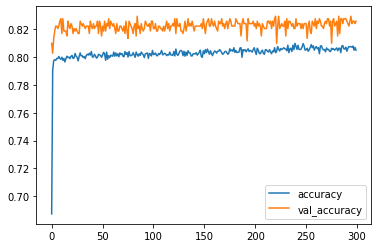

In [118]:
metrics_seq_11[['accuracy', 'val_accuracy']].plot();

In [122]:
model_seq_12 = Sequential()
model_seq_12.add(Dense(20, activation='relu',  input_shape=(28,))) # hidden layer 1
model_seq_12.add(Dense(10, activation="relu"))# hidden layer 2
model_seq_12.add(Dense(1, activation='sigmoid')) # Ouput layer

In [124]:
model_seq_12.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [125]:
history_seq_12 = model_seq_12.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4829 - accuracy: 0.7640 - val_loss: 0.4012 - val_accuracy: 0.8188
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.7910 - val_loss: 0.3912 - val_accuracy: 0.8099
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7954 - val_loss: 0.3954 - val_accuracy: 0.8046
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7962 - val_loss: 0.3939 - val_accuracy: 0.8082
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7962 - val_loss: 0.3902 - val_accuracy: 0.8099
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.7968 - val_loss: 0.3929 - val_accuracy: 0.8135
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.7958 - val_loss: 0.3905 - val_accuracy: 0.8135

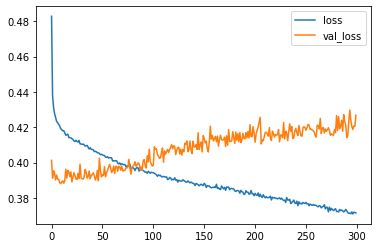

In [126]:
metrics_seq_12 = pd.DataFrame(history_seq_12.history)
metrics_seq_12[['loss', 'val_loss']].plot();

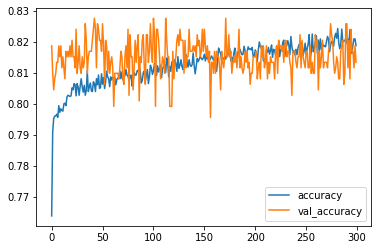

In [127]:
metrics_seq_12[['accuracy', 'val_accuracy']].plot();

In [128]:
model_seq_13 = Sequential()
model_seq_13.add(Dense(25, activation='elu',  input_shape=(28,))) # hidden layer 1
model_seq_13.add(Dense(15, activation="elu"))# hidden layer 2
model_seq_13.add(Dense(5, activation="elu"))# hidden layer 3
model_seq_13.add(Dense(1, activation='sigmoid')) # Ouput layer

In [129]:
model_seq_13.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [130]:
history_seq_13 = model_seq_13.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4652 - accuracy: 0.7766 - val_loss: 0.4032 - val_accuracy: 0.8206
Epoch 2/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7936 - val_loss: 0.3936 - val_accuracy: 0.8242
Epoch 3/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7974 - val_loss: 0.3890 - val_accuracy: 0.8171
Epoch 4/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7956 - val_loss: 0.3904 - val_accuracy: 0.8224
Epoch 5/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.7985 - val_loss: 0.3957 - val_accuracy: 0.8206
Epoch 6/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.7995 - val_loss: 0.3928 - val_accuracy: 0.8153
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8011 - val_loss: 0.3927 - val_accuracy: 0.8064

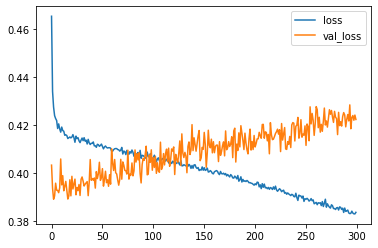

In [131]:
metrics_seq_13 = pd.DataFrame(history_seq_13.history)
metrics_seq_13[['loss', 'val_loss']].plot();

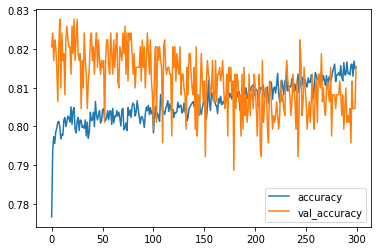

In [132]:
metrics_seq_13[['accuracy', 'val_accuracy']].plot();

In [133]:
model_seq_14 = Sequential()
model_seq_14.add(Dense(20, activation='elu',  input_shape=(28,))) # hidden layer 1
model_seq_14.add(Dense(10, activation="elu"))# hidden layer 2
model_seq_14.add(Dense(1, activation='sigmoid')) # Ouput layer

In [134]:
model_seq_14.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [136]:
history_seq_14 = model_seq_14.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 2s 6ms/step - loss: 0.5099 - accuracy: 0.7284 - val_loss: 0.3956 - val_accuracy: 0.8153
Epoch 2/300
159/159 [==============================] - 1s 4ms/step - loss: 0.4293 - accuracy: 0.7962 - val_loss: 0.3925 - val_accuracy: 0.8135
Epoch 3/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.7974 - val_loss: 0.3868 - val_accuracy: 0.8224
Epoch 4/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.8003 - val_loss: 0.3854 - val_accuracy: 0.8153
Epoch 5/300
159/159 [==============================] - 1s 4ms/step - loss: 0.4241 - accuracy: 0.8001 - val_loss: 0.3911 - val_accuracy: 0.8242
Epoch 6/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4228 - accuracy: 0.7997 - val_loss: 0.3906 - val_accuracy: 0.8242
Epoch 7/300
159/159 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7993 - val_loss: 0.3999 - val_accuracy: 0.8064

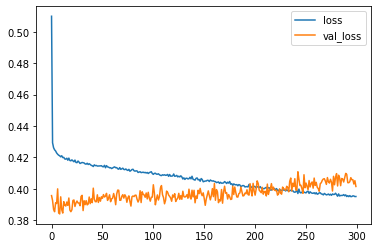

In [137]:
metrics_seq_14 = pd.DataFrame(history_seq_14.history)
metrics_seq_14[['loss', 'val_loss']].plot();

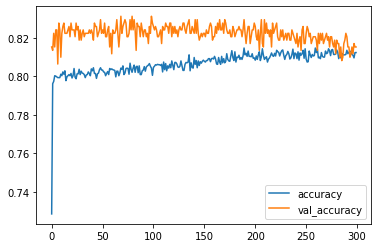

In [138]:
metrics_seq_14[['accuracy', 'val_accuracy']].plot();

In [139]:
model_seq_15 = Sequential()
model_seq_15.add(Dense(25, activation='relu',  input_shape=(28,))) # hidden layer 1
model_seq_15.add(Dense(15, activation='relu'))# hidden layer 2
model_seq_15.add(Dense(5, activation="relu"))# hidden layer 3
model_seq_15.add(Dense(1, activation='sigmoid')) # Ouput layer

In [140]:
model_seq_15.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [141]:
history_seq_15 = model_seq_15.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 2s 5ms/step - loss: 0.6789 - accuracy: 0.7073 - val_loss: 0.6533 - val_accuracy: 0.7922
Epoch 2/300
159/159 [==============================] - 1s 4ms/step - loss: 0.6321 - accuracy: 0.7871 - val_loss: 0.6042 - val_accuracy: 0.8046
Epoch 3/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5988 - accuracy: 0.7908 - val_loss: 0.5762 - val_accuracy: 0.8046
Epoch 4/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5742 - accuracy: 0.7916 - val_loss: 0.5552 - val_accuracy: 0.8064
Epoch 5/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5525 - accuracy: 0.7942 - val_loss: 0.5343 - val_accuracy: 0.8135
Epoch 6/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5346 - accuracy: 0.7974 - val_loss: 0.5135 - val_accuracy: 0.8171
Epoch 7/300
159/159 [==============================] - 1s 3ms/step - loss: 0.5190 - accuracy: 0.7995 - val_loss: 0.4999 - val_accuracy: 0.8188

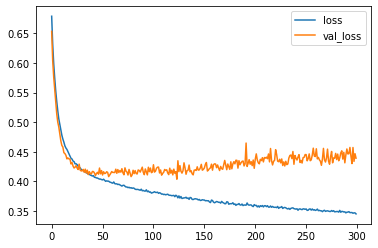

In [142]:
metrics_seq_15 = pd.DataFrame(history_seq_15.history)
metrics_seq_15[['loss', 'val_loss']].plot();

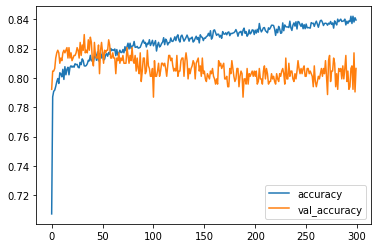

In [143]:
metrics_seq_15[['accuracy', 'val_accuracy']].plot();

#### Model 1:

- Hidden Layer: 2
- Activation: Relu
- Epoch:300
- Dropout: 0.5
- Catatan: Nilai akurasi pada train dan fit sedikit berjauhan dan nilai lossnya masih sedikit berjauhan tetapi sepertinya semakin lama akan semakin berdekatan.
#### Model 2:

- Hidden Layer: 3
- Activation: Relu
- Epoch: 400
- Dropout:0.25
- Catatan: Lossnya sudah saling berdekatan pada epoch 300, tetapi akurasinya sedikit berjauhan dan underfit.


#### Model 3:

- Hidden Layer: 2
- Activation: Relu
- Epoch: 300
- Dropout:0.25
- Catatan: Train dan val saling berdekatan satu sama lain pada epch 300 dan mendekati good-fit.

#### Model 4:

- Hidden Layer: 2
- Activation: elu
- Epoch: 300
- Dropout:0.5
- Catatan: araknya train sama valnya sedikit berjauhan dan model underfit


#### Model 5:

- Hidden Layer: 3
- Activation: Relu
- Epoch: 300
- Dropout:0.5
- Catatan: Akurasi val meningkat tajam pada epoch ke 100 dan exploded. Kemudian nilai train dan val sedikit berjauhan dan modelnya underfit.

#### Model 6:

- Hidden Layer: 3
- Activation: elu
- Epoch: 300
- Dropout:0.5
- Catatan: Jaraknya train sama valnya sedikit berjauhan dan model underfit

#### Model 7:

- Hidden Layer: 2
- Activation: elu
- Epoch: 300
- Dropout:0.25
- Catatan: Jaraknya train sama valnya sedikit berjauhan dan model underfit
#### Model 8:

- Hidden Layer: 3
- Activation: elu
- Epoch: 300
- Dropout:0.25
- Catatan: Jaraknya train sama valnya sedikit berjauhan dan model underfit

#### Model 9:

- Hidden Layer: 1
- Activation: Relu
- Epoch: 300
- Dropout:0.25
- Catatan: Jaraknya train sama valnya sedikit berjauhan dan model underfit

#### Model 10:

- Hidden Layer: 1
- Activation: Relu
- Epoch: 300
- Tidak pake dropout
- Catatan: Jarak train dan val berdekatan pada akurasi dan loss, dan model sedikit underfit

#### Model 11:

- Hidden Layer: 1
- Activation: elu
- Epoch: 300
- Tidak pake dropout
- Catatan: Jarak train dan val berdekatan pada akurasi dan loss, dan model sedikit underfit

#### Model 12:

- Hidden Layer: 2
- Activation: Relu
- Epoch:300
- Tidak pake dropout
- Catatan: Model exploded pada akurasinya


#### Model 13:

- Hidden Layer: 3
- Activation: elu
- Epoch:300
- Tidak pake dropout
- Catatan: Model exploded pada akurasinya

#### Model 14:

- Hidden Layer: 2
- Activation: elu
- Epoch:300
- Tidak pake dropout
- Catatan: Nilai akurasinya lumayan berdekatan, tetapi nilai lossnya paling berdekatan pada epoch ke 200an tetapi saling menjauh pada epoch 300. Pada epoch 300 model menjadi overfit.

#### Model 15:

- Hidden Layer: 3
- Activation: Relu
- Epoch:300
- Tidak pake dropout
- Catatan: Model Overfit, Nilai akurasi train dan val berjauhan


#### Kesimpulan: Diputuskan untuk menggunakan Model 3, karena model tersebut yang paling mendekati good-fit



## Arsitektur Functional API

In [108]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

data_input = Input(shape=(28,))
hidden_1 = Dense(20, activation='relu')(data_input)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(10, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
output = Dense(1, activation='softmax')(hidden_drop_2)

model_2 = Model(inputs=data_input, outputs=output)

In [109]:
# compile
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [110]:
#Train
history_2 = model_2.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
159/159 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2649 - val_loss: 0.0000e+00 - val_accuracy: 0.2593
Epoch 2/30
159/159 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2649 - val_loss: 0.0000e+00 - val_accuracy: 0.2593
Epoch 3/30
159/159 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2649 - val_loss: 0.0000e+00 - val_accuracy: 0.2593
Epoch 4/30
159/159 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2649 - val_loss: 0.0000e+00 - val_accuracy: 0.2593
Epoch 5/30
159/159 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2649 - val_loss: 0.0000e+00 - val_accuracy: 0.2593
Epoch 6/30
159/159 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2649 - val_loss: 0.0000e+00 - val_accuracy: 0.2593
Epoch 7/30
159/159 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2

In [111]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_34 (Dense)            (None, 20)                580       
                                                                 
 dropout_21 (Dropout)        (None, 20)                0         
                                                                 
 dense_35 (Dense)            (None, 10)                210       
                                                                 
 dropout_22 (Dropout)        (None, 10)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params:

In [112]:
import pandas as pd
metrics_2 = pd.DataFrame(history_2.history)
metrics_2

,loss,accuracy,val_loss,val_accuracy
0,0.0,0.264863,0.0,0.259325
1,0.0,0.264863,0.0,0.259325
2,0.0,0.264863,0.0,0.259325
3,0.0,0.264863,0.0,0.259325
4,0.0,0.264863,0.0,0.259325
5,0.0,0.264863,0.0,0.259325
6,0.0,0.264863,0.0,0.259325
7,0.0,0.264863,0.0,0.259325
8,0.0,0.264863,0.0,0.259325
9,0.0,0.264863,0.0,0.259325


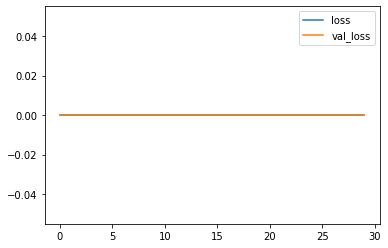

In [113]:
metrics_2[['loss', 'val_loss']].plot();

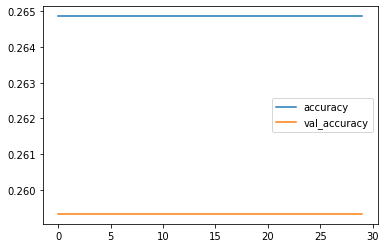

In [114]:
metrics_2[['accuracy', 'val_accuracy']].plot();

In [115]:
y_pred2 = model_2.predict(X_test)

In [116]:
y_pred2 = np.where(y_pred2 < 0.5, 0, 1).squeeze()

In [117]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1028
           1       0.27      1.00      0.42       379

    accuracy                           0.27      1407
   macro avg       0.13      0.50      0.21      1407
weighted avg       0.07      0.27      0.11      1407



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
